In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

Take a look at the first 10 rows.
Look at the last 5 rows. Do you see a problem?
Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[:-2]

In [6]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [7]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [8]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [9]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [10]:
gdp_df.shape

(6729, 3)

In [11]:
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [12]:
gdp_df['Year'] = gdp_df['Year'].astype(int)

In [13]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [14]:
gdp_df['Year'].value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

There is a very even number of observations per year, with it peaking in 2011.

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [15]:
gdp_df['Country'].value_counts(ascending=True)

Djibouti                                     1
South Sudan                                  8
Turks and Caicos Islands                     8
Sint Maarten (Dutch part)                    9
Nauru                                       12
                                            ..
Bahrain                                     29
Romania                                     29
Germany                                     29
IBRD only                                   29
Fragile and conflict affected situations    29
Name: Country, Length: 243, dtype: int64

In [16]:
gdp_df['Country'].value_counts(ascending=True).head(20)

Djibouti                      1
South Sudan                   8
Turks and Caicos Islands      8
Sint Maarten (Dutch part)     9
Nauru                        12
Afghanistan                  17
SÃ£o TomÃ© and Principe      18
Timor-Leste                  19
Kosovo                       19
Palau                        19
Small states                 19
Other small states           19
Qatar                        19
Liberia                      19
CuraÃ§ao                     19
Eritrea                      20
Cayman Islands               20
Libya                        20
San Marino                   21
Montenegro                   22
Name: Country, dtype: int64

There are 243 countries represented in the data set. The max observations are 29, though a number have few - in particular, 4 of the countries have under 10. These countries are either likely very young (such as South Sudan), or did not collect measurements during some years.

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [17]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


11. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [18]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

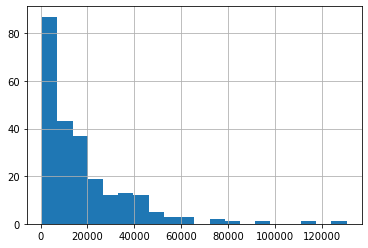

In [36]:
gdp_2014.GDP_Per_Capita.hist(bins=20);

The distribution is unimodal, right-skewed. There look to be only a few observations over $80,000.

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [20]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [21]:
gdp_years = gdp_df.loc[gdp_df['Year'].isin(['1990', '2017'])]
gdp_years.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2017,1758.465636
18,Albania,2017,11796.719185
45,Albania,1990,4458.247115
47,Algeria,2017,13822.389087
74,Algeria,1990,10300.015042


In [22]:
gdp_years = gdp_years.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year")
gdp_years

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
...,...,...
West Bank and Gaza,NaN,4651.723645
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [23]:
gdp_pivoted = gdp_years.dropna()
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [24]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

<ipython-input-24-bfc35d278deb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379


16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [25]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape

(20, 3)

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
Bonus: Put both line charts on the same plot.

In [26]:
gdp_pivoted.sort_values('Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
...,...,...,...
Ukraine,10463.959955,7906.540301,-24.440266
Yemen,3425.707169,2404.422370,-29.812379
Burundi,1027.396660,670.777072,-34.710993


In [27]:
gdp_lineplot = gdp_df.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year")
gdp_lineplot

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,3236.196368,3314.761163,3208.119899,3517.569954,3920.320010,4137.843864,...,3816.165070,4019.485067,4405.778573,4568.509070,4559.032259,4445.307470,4493.612080,4600.685400,4651.723645,4576.432497
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


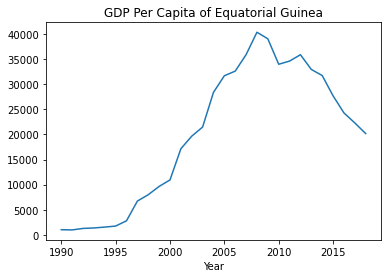

In [28]:
gdp_lineplot.loc['Equatorial Guinea'].plot(y='value', title='GDP Per Capita of Equatorial Guinea');

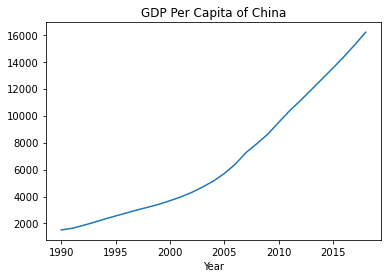

In [29]:
gdp_lineplot.loc['China'].plot(y='value', title='GDP Per Capita of China')

The GDP per capita of Equatorial Guinea rose quickly from 2000-2010, peaked, and then began to fall again. Meanwhile, China has risen at a more consistent pace, and is continuing to rise.

18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [30]:
continents = pd.read_csv('../data/continents.csv')

19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [31]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [32]:
gdp_df = gdp_df.merge(continents, on='Country')

In [33]:
gdp_df.info

<bound method DataFrame.info of           Country  Year  GDP_Per_Capita Continent
0     Afghanistan  2018     1734.723214      Asia
1     Afghanistan  2017     1758.465636      Asia
2     Afghanistan  2016     1757.023490      Asia
3     Afghanistan  2015     1766.593077      Asia
4     Afghanistan  2014     1795.735834      Asia
...           ...   ...             ...       ...
5329     Zimbabwe  1994     2768.309953    Africa
5330     Zimbabwe  1993     2572.870395    Africa
5331     Zimbabwe  1992     2591.007534    Africa
5332     Zimbabwe  1991     2906.272849    Africa
5333     Zimbabwe  1990     2819.549467    Africa

[5334 rows x 4 columns]>

20. Determine the number of countries per continent. Create a bar chart showing this.

In [47]:
gdp_df.groupby('Continent')['Country'].nunique()

Continent
Africa           51
Asia             44
Europe           45
North America    26
Oceania          14
South America    12
Name: Country, dtype: int64

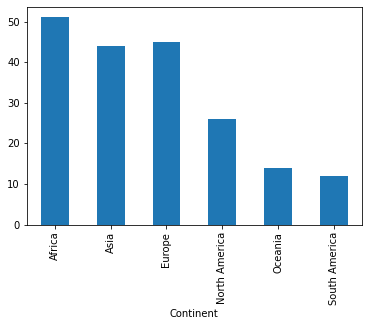

In [51]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind='bar');

21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

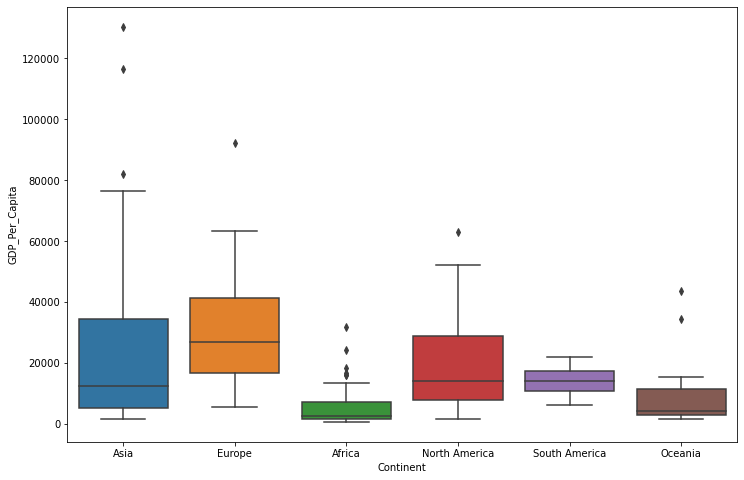

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(data=gdp_df[gdp_df['Year']==2014],
           x='Continent',
           y='GDP_Per_Capita');

Three of the continents - Asia, Europe, and North America - have a large range of values of GDP Per Capita. The other three have very narrow ranges. Europe has notably the highest levels of GDP Per Capita, though Asia does have the highest outliers. Africa is noticably lower than the other continents.

22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [104]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

In [105]:
internet_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [106]:
internet_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


22. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [114]:
internet_df = internet_df.drop('Value Footnotes', axis = 1)

In [116]:
internet_df.columns=['Country', 'Year', 'Internet_Users_Pct']

23. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [121]:
internet_df.shape

(4495, 3)

In [123]:
internet_df.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

24. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well. 

In [132]:
internet_df[internet_df['Internet_Users_Pct']>0].sort_values(by=['Year'], ascending=True)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


In [137]:
internet_df.groupby('Country')[internet_df['Internet_Users_Pct']>0].plot(x='Year', y='Internet_Users_Pct')

KeyError: 'Columns not found: False, True'